### Praticando Regressão

In [50]:
#importando bibliotecas e ocutando warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
#capiturando dados de arquivo csv
dados = pd.read_csv('train.csv', sep=';')
dados.head()

,companhia,opex,remuneracaoEmAcoes,despesasAdministrativas,exercicioOpcoes,compraTitulos,jurosAPagar,valorGastoExercicioOpcoes,amortizacao,rendaOperacoesContinuadas,lucroBruto,receitas,ativos,passivos,depreciacao,ganhosPorAcao,ebtida,temDivida
0,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,6700000.0,NaN,40500000.0,236900000.0,NaN,1.442100e+09,NaN,NaN,1.37,NaN,0.0
1,1800.0,NaN,NaN,NaN,314000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.124700e+10,NaN,871000000.0,2.94,NaN,1.0
2,2034.0,NaN,NaN,NaN,729000.0,NaN,NaN,729000.0,30977000.0,NaN,142785000.0,NaN,5.407780e+08,236336000.0,1522000.0,1.19,NaN,1.0
3,2098.0,NaN,NaN,NaN,NaN,NaN,NaN,1248782.0,NaN,NaN,39561218.0,1.098120e+08,8.142137e+07,38237805.0,1318357.0,1.44,NaN,0.0
4,2178.0,NaN,NaN,9939000.0,NaN,NaN,NaN,NaN,NaN,-1275000.0,NaN,1.944279e+09,2.432150e+08,90705000.0,NaN,NaN,NaN,0.0


### Remover colunas não cruzadas

In [4]:
#missing dos dados quantidas de colunas com campos nulos em porcentagem
dados.isnull().sum() / len(dados)

companhia                    0.000000
opex                         0.560714
remuneracaoEmAcoes           0.777857
despesasAdministrativas      0.590238
exercicioOpcoes              0.675000
compraTitulos                0.800238
jurosAPagar                  0.804762
valorGastoExercicioOpcoes    0.735238
amortizacao                  0.784762
rendaOperacoesContinuadas    0.809524
lucroBruto                   0.601905
receitas                     0.556667
ativos                       0.000000
passivos                     0.251429
depreciacao                  0.458810
ganhosPorAcao                0.335476
ebtida                       1.000000
temDivida                    0.000000
dtype: float64

In [5]:
#criando um novo dataset removendo colunas com 
# porcentagem de nulos maior que 80% e coluna target temDivida

dados_1 = dados.drop(columns=['compraTitulos','jurosAPagar','rendaOperacoesContinuadas',
          'ebtida','temDivida'])

In [6]:
#desconsiderando  Id da companhia e tornando-o indice 
# pois não pode fazer parte do nosso treinamento pois não é um dado relevante 
indice = dados_1['companhia']
dados1 = dados_1.drop(columns=['companhia'],axis=1)

In [7]:
dados_1.columns

Index(['companhia', 'opex', 'remuneracaoEmAcoes', 'despesasAdministrativas',
       'exercicioOpcoes', 'valorGastoExercicioOpcoes', 'amortizacao',
       'lucroBruto', 'receitas', 'ativos', 'passivos', 'depreciacao',
       'ganhosPorAcao'],
      dtype='object')

In [37]:
# remove empresas que não retornaram despesas administrativas
dados_2 = dados_1.loc[dados_1['despesasAdministrativas'] > 1]
dados = dados.loc[dados['despesasAdministrativas'] > 1]

In [38]:
#consulta após alteração
dados_2.isnull().sum() / len(dados_2)

companhia                    0.000000
opex                         0.408401
remuneracaoEmAcoes           0.773046
despesasAdministrativas      0.000000
exercicioOpcoes              0.678530
valorGastoExercicioOpcoes    0.712369
amortizacao                  0.786464
lucroBruto                   0.610852
receitas                     0.496499
ativos                       0.000000
passivos                     0.221704
depreciacao                  0.495333
ganhosPorAcao                0.446324
dtype: float64

Variavel do histograma: companhia


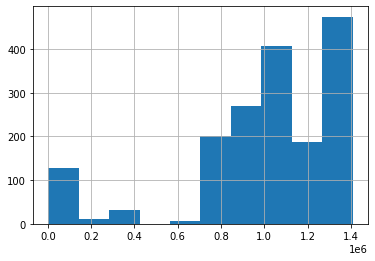

Variavel do histograma: opex


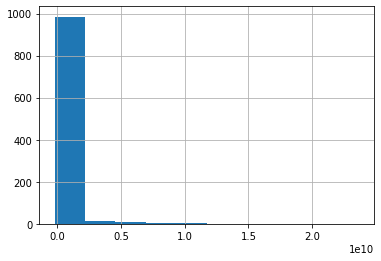

Variavel do histograma: remuneracaoEmAcoes


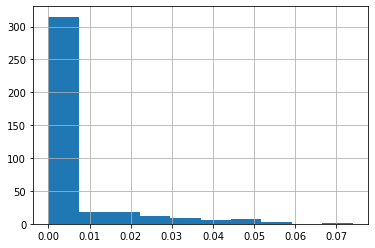

Variavel do histograma: despesasAdministrativas


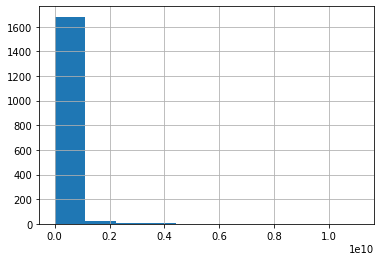

Variavel do histograma: exercicioOpcoes


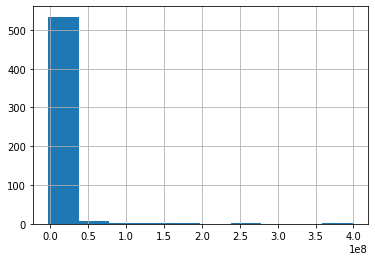

Variavel do histograma: valorGastoExercicioOpcoes


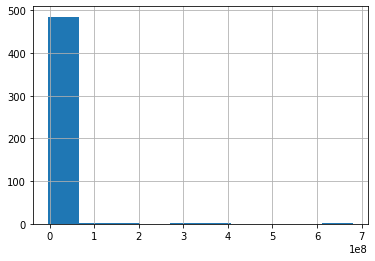

Variavel do histograma: amortizacao


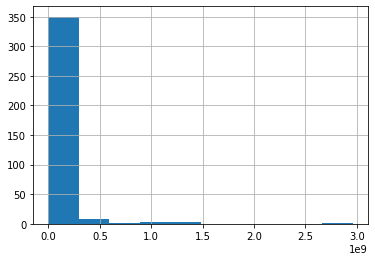

Variavel do histograma: lucroBruto


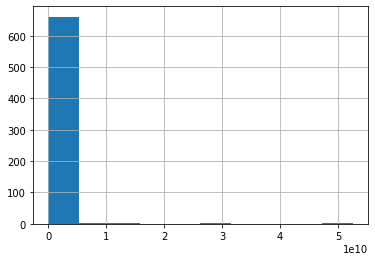

Variavel do histograma: receitas


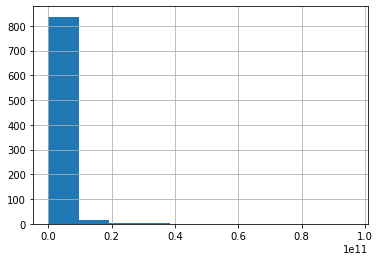

Variavel do histograma: ativos


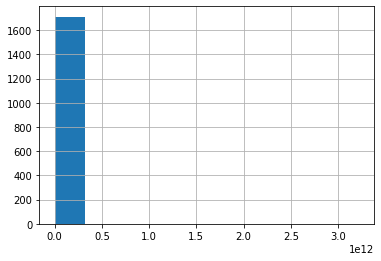

Variavel do histograma: passivos


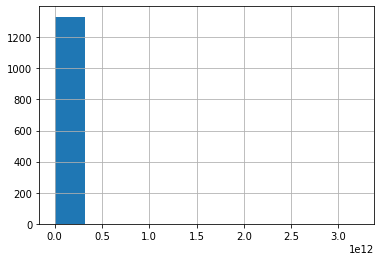

Variavel do histograma: depreciacao


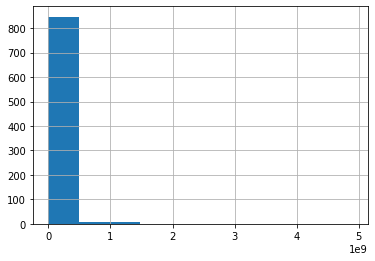

Variavel do histograma: ganhosPorAcao


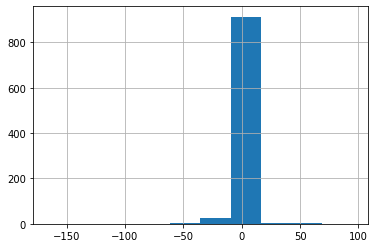

In [39]:
#funcao exibe historograma de todas colulas
def hist(df):
    columns = df.columns
    
    for x in columns:
        df[x].hist()
        print('Variavel do histograma: {}' .format(x))
        plt.show()
hist(dados_2)


In [40]:
dados_2['amortizacao'].value_counts()

0.0           5
500000.0      4
2800000.0     3
2400000.0     2
72000000.0    2
             ..
11000000.0    1
2152000.0     1
74000.0       1
17675000.0    1
6144000.0     1
Name: amortizacao, Length: 347, dtype: int64

In [52]:
#vamos fazer o tratamento de dados faltantes replicar por -1
dados_2 = dados_2.fillna(-1)

In [53]:
#valida se existe campo nulo
dados_2.isnull().any()

companhia                    False
opex                         False
remuneracaoEmAcoes           False
despesasAdministrativas      False
exercicioOpcoes              False
valorGastoExercicioOpcoes    False
amortizacao                  False
lucroBruto                   False
receitas                     False
ativos                       False
passivos                     False
depreciacao                  False
ganhosPorAcao                False
dtype: bool

In [54]:
#valida tipo de variavel
dados_2.dtypes

companhia                    float64
opex                         float64
remuneracaoEmAcoes           float64
despesasAdministrativas      float64
exercicioOpcoes              float64
valorGastoExercicioOpcoes    float64
amortizacao                  float64
lucroBruto                   float64
receitas                     float64
ativos                       float64
passivos                     float64
depreciacao                  float64
ganhosPorAcao                float64
dtype: object

In [55]:
#troca tipo para inteiro
dados_2.astype(int)

,companhia,opex,remuneracaoEmAcoes,despesasAdministrativas,exercicioOpcoes,valorGastoExercicioOpcoes,amortizacao,lucroBruto,receitas,ativos,passivos,depreciacao,ganhosPorAcao
4,2178,0,0,9939000,0,0,0,0,1944279000,243215000,90705000,0,0
13,3499,112710000,0,5406000,0,0,0,0,0,1447808000,1094928000,0,0
14,3545,0,0,16894000,0,0,0,35953000,153119000,460580000,282981000,0,1
15,3570,720198000,0,423862000,0,2279000,0,0,270885000,19019589000,0,82680000,0
19,4447,0,0,557000000,0,0,0,0,6561000000,34195000000,13794000000,0,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,1408198,0,0,86007000,3631000,19698000,186606000,0,1075013000,3146987000,2245500000,30889000,2
4195,1408278,0,0,15543000,70000,70000,6198000,0,110245000,89026000,42922000,0,0
4196,1408299,2241859,0,1429495,0,0,0,215903,346910,448606,1239794,18512,0
4197,1408351,4691915,0,1568506,0,0,0,0,918565,872346,9185062,63294,0


## Codigo de modelagem para Classificação

Passos para rodar modelo

0. Renomear variaveis, caso seja necessario
1. Verificação de problema raro-  targe com apenas 5% de observações
2. Pipeline de modelagem

In [ ]:
dados_2 = dados_2

In [ ]:
#verificação de problemas raros

In [45]:
# separar respostas
expl = dados_2.drop(columns=['ativos'], axis=1)
target = dados['ativos']

In [46]:
expl.shape

(1714, 12)

In [47]:
target.shape

(1714,)

In [48]:
#
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(expl, target, test_size=0.3, random_state=42)

In [49]:
x_treino

,companhia,opex,remuneracaoEmAcoes,despesasAdministrativas,exercicioOpcoes,valorGastoExercicioOpcoes,amortizacao,lucroBruto,receitas,passivos,depreciacao,ganhosPorAcao
2597,1070985.0,1.228080e+09,0.0,103936000.0,7700000.0,7700000.0,0.0,0.0,1.755745e+09,1.893270e+09,151400000.0,1.90
2821,1104506.0,1.174930e+08,0.0,43216000.0,5112000.0,5112000.0,0.0,0.0,0.000000e+00,4.485800e+07,0.0,0.00
1302,821483.0,0.000000e+00,0.0,44271000.0,0.0,0.0,18630000.0,0.0,2.066337e+09,5.516500e+08,0.0,-1.06
3357,1273441.0,0.000000e+00,0.0,32353000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,-0.94
1933,926423.0,2.942900e+07,0.0,18966000.0,0.0,0.0,3488000.0,2669000.0,5.181900e+07,2.972200e+07,0.0,-3.22
...,...,...,...,...,...,...,...,...,...,...,...,...
3125,1168054.0,0.000000e+00,0.0,74688000.0,21439000.0,8451000.0,0.0,0.0,1.452619e+09,2.445608e+09,0.0,-25.92
3447,1289945.0,0.000000e+00,0.0,42159000.0,0.0,0.0,418000.0,0.0,0.000000e+00,5.686900e+07,8570000.0,3.99
2568,1067294.0,0.000000e+00,0.0,147544000.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,72390000.0,6.85
3749,1347652.0,0.000000e+00,0.0,9745704.0,0.0,0.0,0.0,0.0,7.128894e+07,2.342957e+08,0.0,0.79


In [ ]:
dt_reg = Decision